# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dessy Fitriaya Anwari
- **Email:** dessyfitriaya@gmail.com
- **ID Dicoding:** dessy1512

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### customers_df

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### order_items_df

In [ ]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### order_payments_df

In [ ]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### orders_df

In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### product_eng_name_df

In [ ]:
product_eng_name_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/product_category_name_translation.csv")
product_eng_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### products_df

In [ ]:
products_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### sellers_df

In [ ]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/dessyfitriaya/ecommerce-public-analysis/main/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### customers_df

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print("Duplicate: ", customers_df.duplicated().sum())

Duplicate:  0


In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### order_items_df

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
order_items_df.duplicated().sum()

0

In [ ]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### order_payments_df

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
order_payments_df.duplicated().sum()

0

In [ ]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.duplicated().sum()

0

#### product_eng_name_df

In [ ]:
product_eng_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_eng_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
product_eng_name_df.duplicated().sum()

0

#### products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.duplicated().sum()

0

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### sellers_df

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
sellers_df.duplicated().sum()

0

### Cleaning Data

#### Membersihkan tabel order_items_df

##### Memperbaiki tipe data

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel orders_df



##### Memperbaiki tipe data

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders_df.describe()

<ipython-input-38-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-38-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-38-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()
<ipython-input-38-37b5d74db2fe>:1: FutureWarning: Treating datetime data as categoric

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [ ]:
customers_df.sample(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3551,6f33f93011237ac8e47e0652b5da71de,2c5100ebe43494cc2e7c912d5366f253,88062,florianopolis,SC
17630,9aec5bfd40cd595a69062c07fe5f9d85,72d56caffcf01308a62c63240fb9e7d2,29066,vitoria,ES
54803,3b9375de9837ce03b6516b3a343ad6be,45f5f13a2b829876657e16fb7d23e454,78117,varzea grande,MT
57845,6db1d46b53c6eebb6acf6f0f52736350,9d3a7edbff93f003097cb138484f1515,37600,cambui,MG
24044,2a8b1640932137497bd86e83df558d64,c25f3aaefa757fb6d2ac42b59a1c1989,20070,rio de janeiro,RJ
42854,a736734cb89d5f365d332246ce185a10,2a17ad8e3e7b1a0736096f005a07cefd,3980,sao paulo,SP


In [ ]:
customers_df.customer_unique_id.is_unique

False

In [ ]:
customers_df.groupby(by="customer_unique_id").customer_id.nunique().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: customer_id, Length: 96096, dtype: int64

In [ ]:
# customer per state
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

In [ ]:
# customer per city
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

### Explore order_items_df

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df['price_per_unit'] = order_items_df['price'] / order_items_df['order_item_id']
order_items_df['freight_per_unit'] = order_items_df['freight_value'] / order_items_df['order_item_id']

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14


In [ ]:
# produk yang paling banyak diorder
order_items_df.groupby(by="product_id").order_item_id.sum().sort_values(ascending=False)

product_id
422879e10f46682990de24d770e7f83d    793
aca2eb7d00ea1a7b8ebd4e68314663af    640
368c6c730842d78016ad823897a372db    551
53759a2ecddad2bb87a079a1f1519f73    545
99a4788cb24856965c36a24e339b6058    542
                                   ... 
6ec96c91757fad0aecafc0ee7f262dcc      1
6ec26b3516fecd18cda3001a9c48a242      1
6ec18f98bd4eb7efc0989af1505a3f86      1
6ebdbcab1f0dc7e1d3ecb01c1b140ade      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: order_item_id, Length: 32951, dtype: int64

In [ ]:
# seller dengan orderan paling banyak
order_items_df.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
ceb7b4fb9401cd378de7886317ad1b47       1
cecd97bc34ed8330bd4cd15713eda670       1
5b92bfa4120daa27c574daa2e386c693       1
5aaa890629f83706d8d9bfecd8377c1c       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

### Explore order_payments_df

In [ ]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments_df['installment_value'] = order_payments_df['payment_value'] / order_payments_df['payment_installments']
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,installment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,12.41625
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,24.39000
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,65.71000
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,13.47250
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,64.22500


In [ ]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders_df

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28


In [ ]:
pd.to_datetime(orders_df['order_purchase_timestamp']).min()

Timestamp('2016-09-04 21:15:19')

### Explore orders_df & customers_df

#### Menggabungkan orders_df & customers_df

In [ ]:
customer_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1 days 23:47:38
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,13 days 19:26:20
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3 days 03:27:51
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,0 days 16:41:43
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10 days 05:39:48


In [ ]:
customer_order_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_time                    2966
dtype: int64

### Explore order_items_df & order_payments_df

---



#### Menggabungkan order_items_df & order_payments_df

In [ ]:
order_items_payment_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_payment_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,payment_sequential,payment_type,payment_installments,payment_value,installment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,1.0,credit_card,2.0,72.19,36.095
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,1.0,credit_card,3.0,259.83,86.610
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,1.0,credit_card,5.0,216.87,43.374
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,1.0,credit_card,2.0,25.78,12.890
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,1.0,credit_card,3.0,218.04,72.680


### Explore products_df

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Explore product_eng_name_df

In [ ]:
product_eng_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Explore products_df & product_eng_name_df

#### Menggabungkan products_df & product_eng_name_df

In [ ]:
products_detail_df = pd.merge(
    left=products_df,
    right=product_eng_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_detail_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [ ]:
products_detail_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### Explore sellers_df

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore sellers_df & order_items_df

#### Menggabungkan sellers_df & order_items_df

In [ ]:
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,87900,loanda,PR


### Explore all data

#### Menggabungkan semua data

In [ ]:
all_df_1 = pd.merge(
    left=order_items_payment_df,
    right=customer_order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df_1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,payment_sequential,...,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,1.0,...,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1 days 05:09:32
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,1.0,...,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8 days 01:29:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,1.0,...,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6 days 00:42:28
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,1.0,...,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4 days 00:04:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,1.0,...,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13 days 06:56:22


In [ ]:
all_df_2 = pd.merge(
    left=all_df_1,
    right=products_detail_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,payment_sequential,...,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,1.0,...,1 days 05:09:32,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,1.0,...,8 days 01:29:24,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,1.0,...,6 days 00:42:28,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,1.0,...,4 days 00:04:39,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,1.0,...,13 days 06:56:22,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [ ]:
all_df = pd.merge(
    left=all_df_2,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,payment_sequential,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,1.0,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,1.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,1.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,1.0,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,1.0,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [ ]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_unit,freight_per_unit,payment_sequential,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,1.0,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,1.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,1.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,1.0,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,1.0,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28


In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head(12)

,order_approved_at,order_count,revenue
0,September,1,134.97
1,October,310,51074.62
2,November,0,0.00
3,December,1,10.90
4,January,752,123055.93
5,February,1718,261021.82
6,March,2650,392718.30
7,April,2365,389495.92
8,May,3661,546437.40
9,June,3228,457208.99


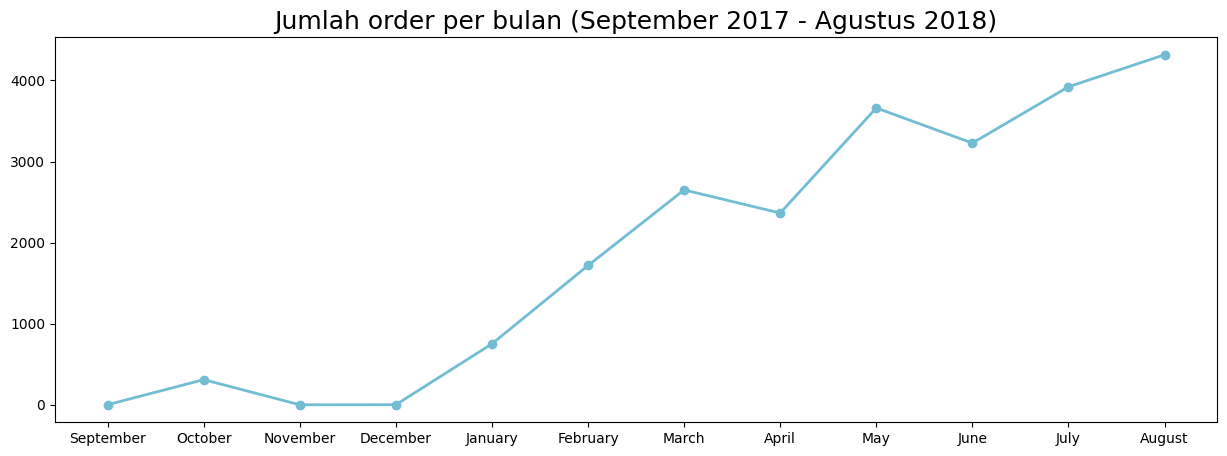

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(
    monthly_orders_df["order_approved_at"][0:12],
    monthly_orders_df["order_count"][0:12],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah order per bulan (September 2017 - Agustus 2018)", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

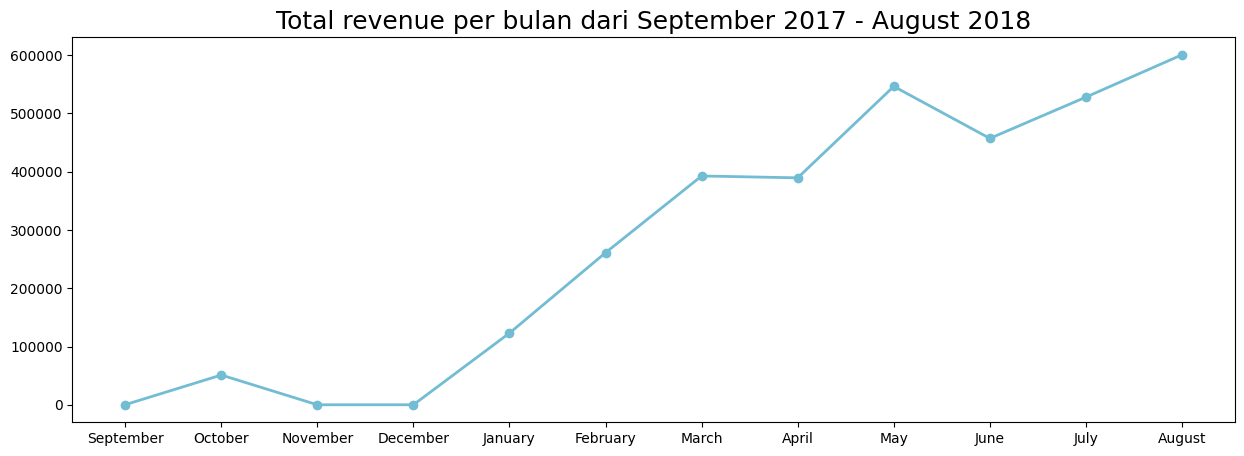

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(
    monthly_orders_df["order_approved_at"][0:12],
    monthly_orders_df["revenue"][0:12],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total revenue per bulan dari September 2017 - August 2018", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit diorder?

In [ ]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head()

,product_category_name_english,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11432
3,sports_leisure,10279
4,computers_accessories,10186


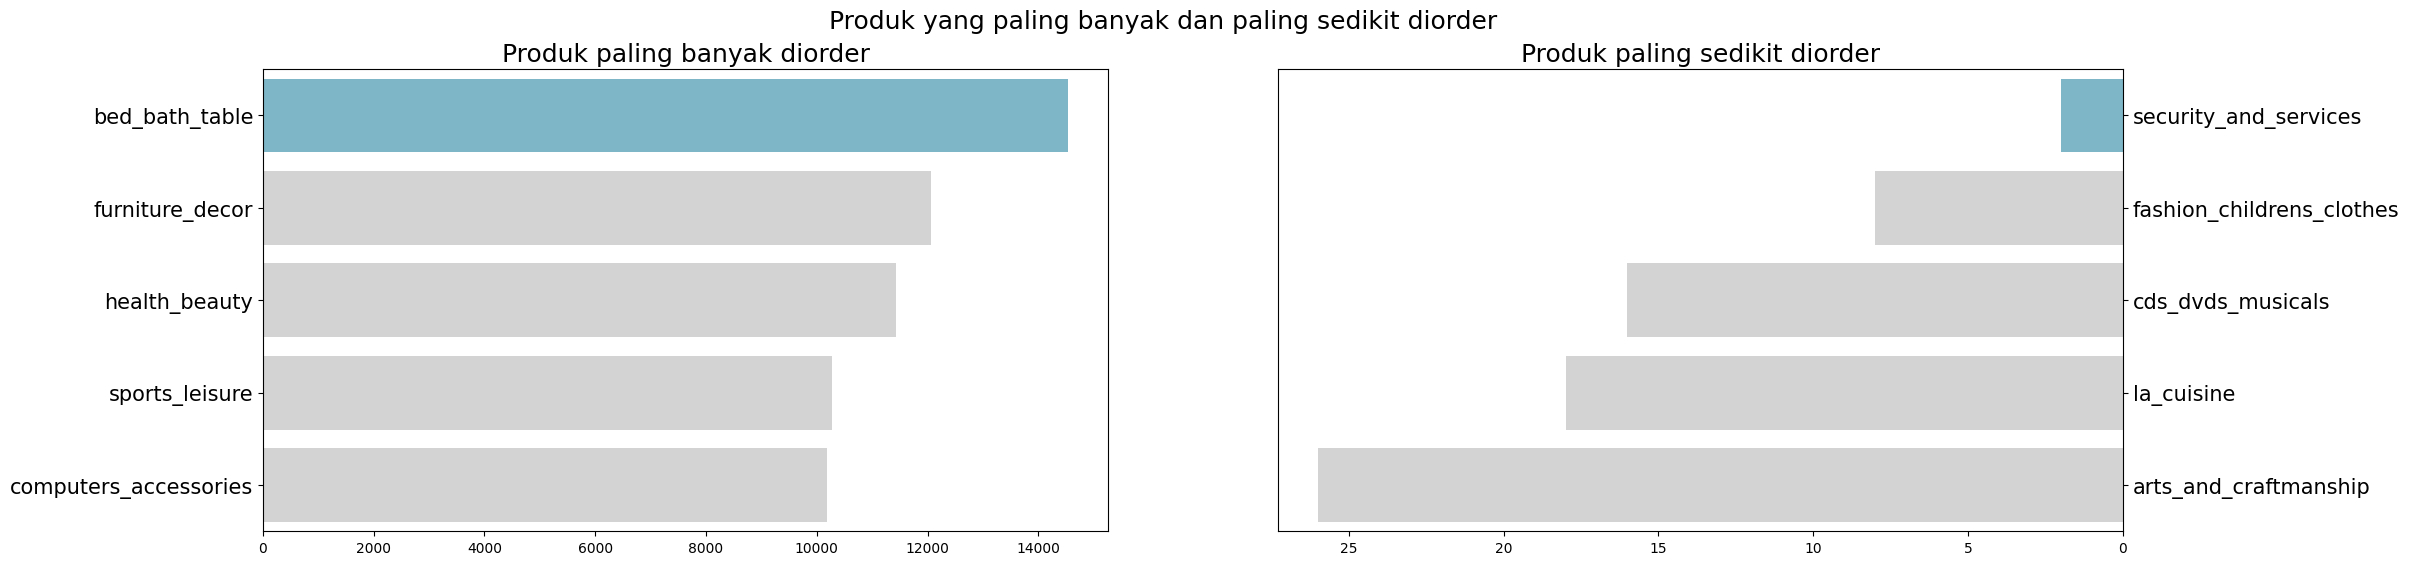

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id",
            y="product_category_name_english",
            hue="product_category_name_english",
            data=sum_order_items_df.head(5),
            palette=colors,
            ax=ax[0],
            legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak diorder", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_item_id",
            y="product_category_name_english",
            hue="product_category_name_english",
            data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5),
            palette=colors, ax=ax[1],
            legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit diorder", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk yang paling banyak dan paling sedikit diorder", fontsize=18)
plt.show()

## RFM Analysis

In [ ]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00


In [ ]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


In [ ]:
rfm_df.describe()

,frequency,monetary,recency
count,95420.000000,95420.000000,95420.000000
mean,1.034018,148.912705,287.501457
std,0.211234,248.583783,153.160850
min,1.000000,0.850000,44.000000
25%,1.000000,48.900000,163.000000
50%,1.000000,89.900000,268.000000
75%,1.000000,159.900000,397.000000
max,16.000000,13440.000000,773.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_unique_id,frequency,monetary,recency
95083,ff22e30958c13ffe219db7d711e8f564,2,290.00,44
65645,afbcfd0b9c5233e7ccc73428526fbb52,1,457.75,49
92476,f80013faf776e37bcea7634d59c2181e,1,65.00,49
67518,b4dcade04bc548b7e3b0243c801f8c26,1,99.00,49
1538,0421e7a23f21e5d54efed456aedbc513,1,109.90,49


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_unique_id,frequency,monetary,recency
52597,8d50f5eadf50201ccdcedfb9e2ac8455,16,729.62,58
23302,3e43e6105506432c953e165fb2acf44c,9,1000.85,232
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,855.21,245
37532,6469f99c1f9dfae7733b25662e7f1782,7,664.20,111
75560,ca77025e7201e3b30c44b472ff346268,7,806.61,138


In [ ]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_unique_id,frequency,monetary,recency
3799,0a0a92112bd4c708ca5fde585afaa872,1,13440.00,383
51803,8af7ac63b2efbcbd88e5b11505e8098a,1,11383.95,545
73411,c4b224d2c784bae11ae98b6ae9f2454c,1,10856.10,506
49843,85963fd37bfd387aa6d915d8a1065486,1,9888.00,245
71092,be74c431147c32ab2d7c7cef5e4a995f,1,9520.14,160


<ipython-input-81-4b9922d192e7>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(y="recency",
<ipython-input-81-4b9922d192e7>:17: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="frequency",


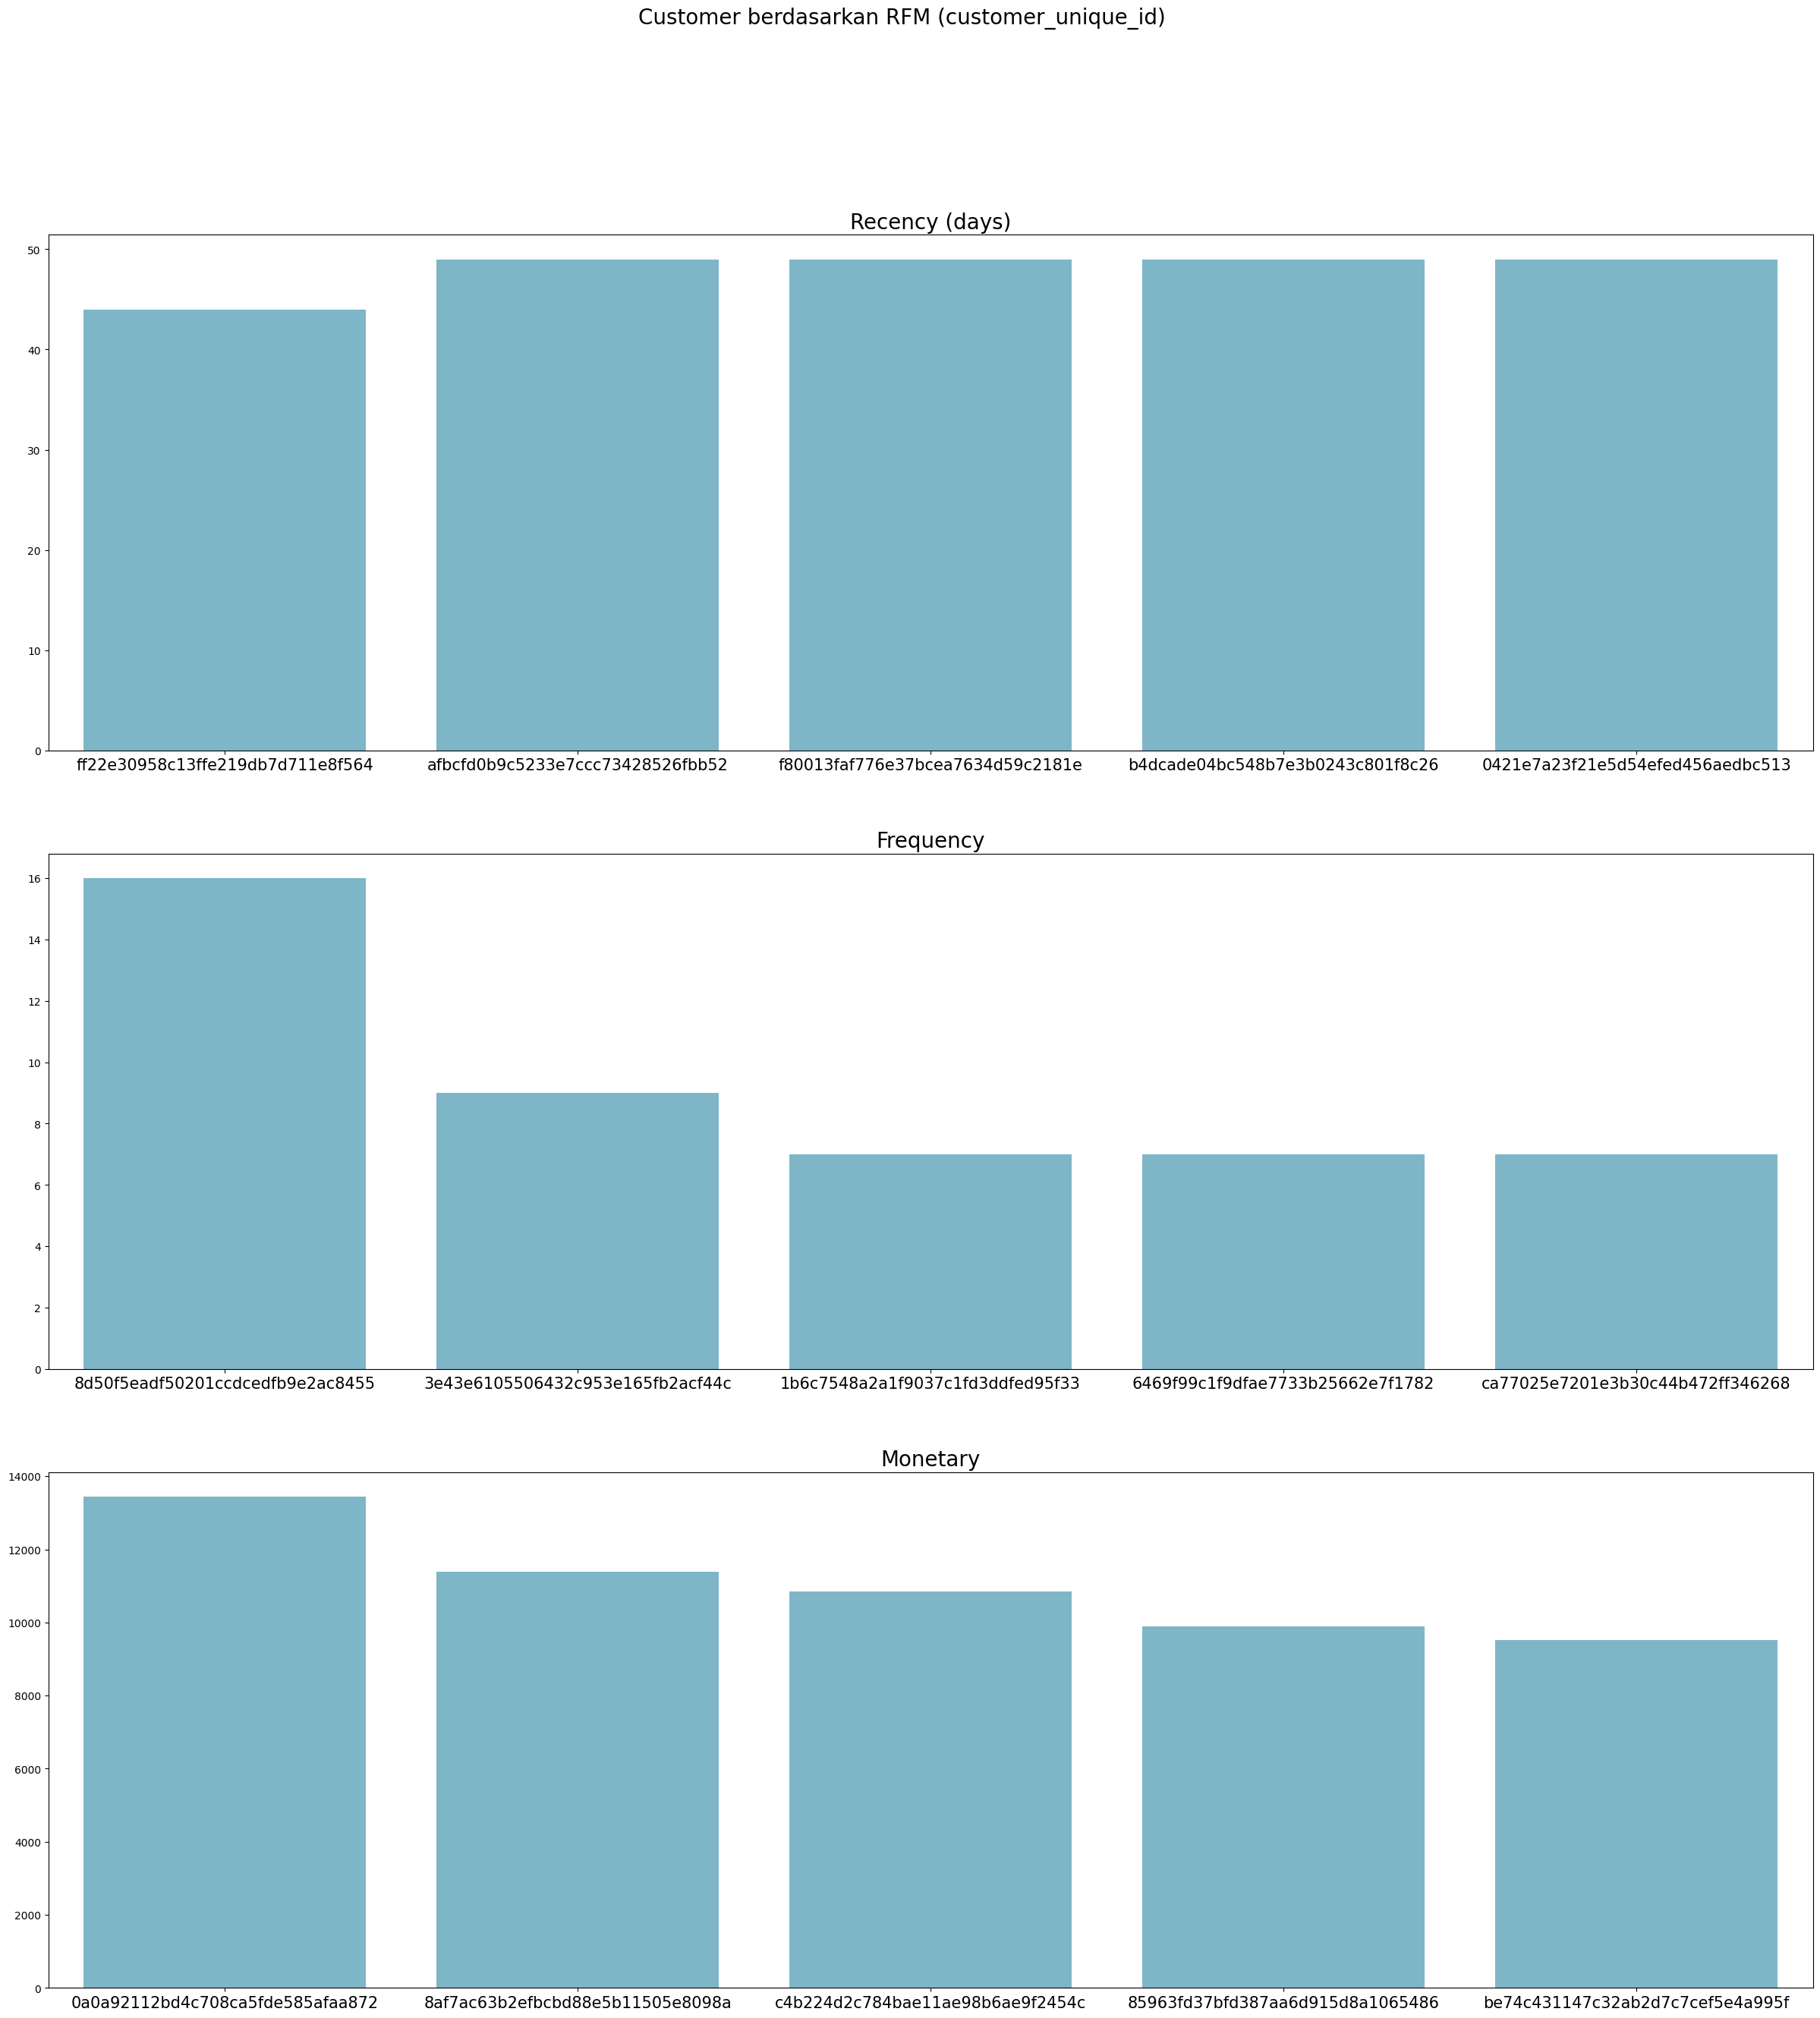

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 30))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency",
            x="customer_unique_id",
            hue="recency",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            palette=colors,
            ax=ax[0],
            legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=20)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency",
            x="customer_unique_id",
            hue="frequency",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=colors,
            ax=ax[1],
            legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary",
            x="customer_unique_id",
            hue="monetary",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=colors,
            ax=ax[2],
            legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=20)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Customer berdasarkan RFM (customer_unique_id)", fontsize=20)
plt.show()

In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclusion pertanyaan 1:
  Penjualan paling tinggin terjadi pada Agustus 2018. Pada bulan itu juga perusahaan mendapat revenue paling besar dibandingkan dengan bulan-bulan sebelumnya. Performa penjualan paling buruk terjadi pada November 2017, di mana tidak ada barang yang terjual sehingga perusahaan tidak memperoleh revenue sama sekali pada bulan itu.

- Conclusion pertanyaan 2:
  produk dengan kategori bad_bath_table merupakan produk yang paling banyak diorder, dan yang paling sedikit diorder adalah produk dengan kategori security_and_services.

- Conclusion pertanyaan 3:
  Parameter recency paling rendah dimiliki oleh pelanggan dengan customer_unique_id ff22e30958c13ffe219db7d711e8f564. Jarak antara waktu order terakhir pelanggan ini dengan order paling baru adalah 44 hari.

- Conclusion pertanyaan 4:
  Pelanggan dengan customer_unique_id 8d50f5eadf50201ccdcedfb9e2ac8455 melakukan pembelian paling banyak dalam beberapa bulan terakhir, yaitu sebanyak 16 kali.

- Conclusion pertanyaan 5:
  Pelanggan dengan customer_unique_id 0a0a92112bd4c708ca5fde585afaa872 menghabiskan uang paling banyak yaitu sebesar $13.440